In [1]:
import pandas as pd
from sympy import *
from scipy import stats
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import asyncio
import random

# P4

In [9]:
n=1000
alpha, beta=np.random.rand(2)
xi=np.sort(np.random.normal(0,1,1000))
print(alpha)
print(beta)

0.18811808181796985
0.6921618499509162


In [10]:
def edf(arr):
    arr=np.sort(arr)
    ys=np.arange(1,len(arr)+1)/float(len(arr))
    return(arr,ys)

In [11]:
def sig(x0,xbar,x2bar):
    sigma=1/n+(((x0-xbar)/(n*(x2bar-xbar))**2))
    return sigma

In [12]:
y0=[]
x0=np.random.rand()
lr=LinearRegression()
for i in range(n):
    epsilon=np.random.normal(0,1,n)
    yi=alpha+beta*xi+epsilon
    lr.fit(xi.reshape(-1,1),yi)
    alphahat=lr.intercept_
    betahat=lr.coef_
    y0.append((alphahat+betahat*x0)[0])
y0=np.sort(y0)
a,b=edf(y0)


In [13]:
xbar=np.mean(xi)
x2bar=np.mean(xi**2)
mu=alpha+beta*x0
sigma=np.sqrt(sig(x0,xbar,x2bar))
c,d=edf(np.random.normal(mu,sigma,n))

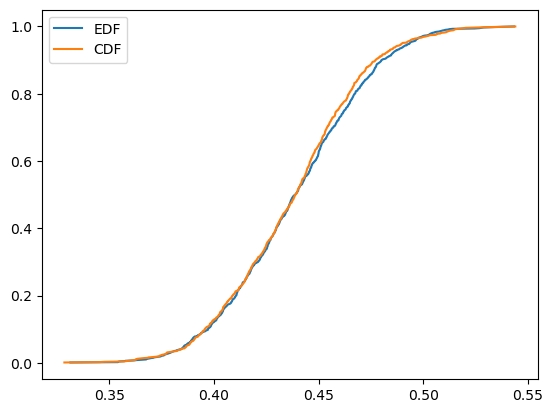

In [17]:
plot=()
plt.plot(a,b,label="EDF") 
plt.plot(c,d,label="CDF")
plt.legend()

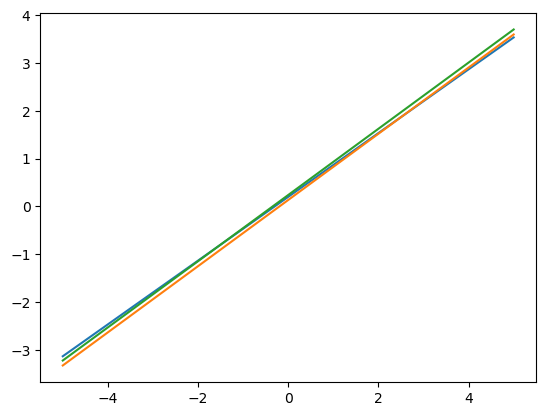

In [15]:
x=np.linspace(-5,5,1000)
y0=[]
y0min=[]
y0max=[]
for i in range(n):
    y0.append(alphahat+betahat*x[i])
    mu=alpha+beta*x[i]
    sigma=np.sqrt(sig(x[i], xbar, x2bar))
    y0min.append(stats.norm.ppf(0.05,mu,sigma))
    y0max.append(stats.norm.ppf(0.95,mu,sigma))
plt.plot(x,y0)
plt.plot(x,y0min)
plt.plot(x,y0max)

# P6

In [52]:
def f(x):
    y = [1/(1+(25*(i)**2)) for i in x]
    return y
x=np.linspace(-10,10,10000)
y=f(x)
x0=np.sort(np.random.uniform(0,1,1000))

In [23]:
def total(n):
    fhat=np.poly1d(np.polyfit(x, y, n))
    var_fhat=np.var(fhat(x0))
    bias2=np.mean((f(x0)-np.mean(fhat(x0)))**2)
    var_epsilon=np.var(f(x0)-fhat(x0))
    MSE=var_fhat+bias2+var_epsilon
    return np.array([MSE,bias2,var_fhat]).reshape((1,3))


/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/1782394548.py:6: RankWarning: Polyfit may be poorly conditioned
  result=np.r_[result, total(i)]
/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/1782394548.py:6: RankWarning: Polyfit may be poorly conditioned
  result=np.r_[result, total(i)]
/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/1782394548.py:6: RankWarning: Polyfit may be poorly conditioned
  result=np.r_[result, total(i)]
/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/1782394548.py:6: RankWarning: Polyfit may be poorly conditioned
  result=np.r_[result, total(i)]
/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/1782394548.py:6: RankWarning: Polyfit may be poorly conditioned
  result=np.r_[result, total(i)]
/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/1782394548.py:6: RankWarning: Polyfit may be poorly conditioned
  result=np.r_[result, total(i)]
/var/folders/3g/ycs_8fys74dc0dww5t

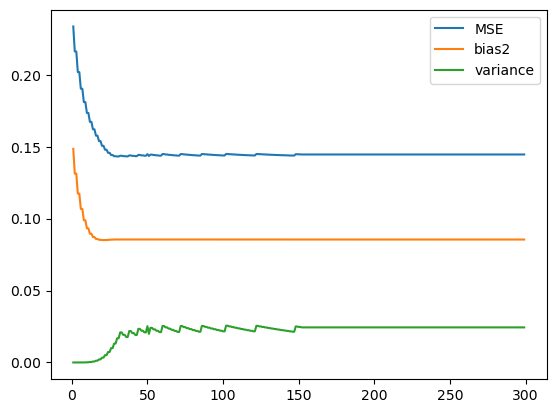

In [26]:
n=np.arange(1,300)
result=total(1)

#np.poly1d(np.polyfit(x, y, n))
for i in range(1+1,300):
    result=np.r_[result, total(i)]

plt.plot(n,result[:,0],label="MSE")
plt.legend()
plt.plot(n,result[:,1],label="bias2")
plt.legend()
plt.plot(n,result[:,2],label="variance")
plt.legend()

The fifure above has shown that the variance is increasing and then converge, MSE is decreasing at first and the converge, which fits the expectation. 

# P7

In [3]:

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, t
import matplotlib.pyplot as plt

# Load the S&P 500 data
data = pd.read_csv('https://raw.githubusercontent.com/Jay2251929205/Jiayi-Wang-ECON317/main/data/SPX30years.csv')

# Compute the daily log returns using the closing price
log_returns = np.log(data['Close']).diff().dropna()

# Compute the sample skewness and kurtosis using the moment-based method
skewness_moment = skew(log_returns)
kurtosis_moment = kurtosis(log_returns)

# Compute the sample skewness and kurtosis using the quantile-based method
quantiles = np.quantile(log_returns, [0.1, 0.25, 0.5, 0.75, 0.9])
skewness_quantile = [skew(log_returns[log_returns < q]) for q in quantiles] + [skew(log_returns[log_returns >= quantiles[-1]])]
kurtosis_quantile = [kurtosis(log_returns[log_returns < q]) for q in quantiles] + [kurtosis(log_returns[log_returns >= quantiles[-1]])]

# Set the number of bootstrap samples and the confidence level
num_bootstraps = 1000
conf_level = 0.95



In [4]:
# Initialize arrays to store the bootstrap results
skewness_moment_boot = np.zeros(num_bootstraps)
kurtosis_moment_boot = np.zeros(num_bootstraps)
skewness_quantile_boot = np.zeros((num_bootstraps, len(quantiles) + 1))
kurtosis_quantile_boot = np.zeros((num_bootstraps, len(quantiles) + 1))

# Perform the bootstrap
for i in range(num_bootstraps):
    # Sample with replacement from the log returns
    log_returns_boot = np.random.choice(log_returns, size=len(log_returns), replace=True)
    
    # Compute the skewness and kurtosis using the moment-based method
    skewness_moment_boot[i] = skew(log_returns_boot)
    kurtosis_moment_boot[i] = kurtosis(log_returns_boot)
    
    # Compute the skewness and kurtosis using the quantile-based method
    for j in range(len(quantiles)):
        skewness_quantile_boot[i, j] = skew(log_returns_boot[log_returns_boot < quantiles[j]])
        kurtosis_quantile_boot[i, j] = kurtosis(log_returns_boot[log_returns_boot < quantiles[j]])
    skewness_quantile_boot[i, -1] = skew(log_returns_boot[log_returns_boot >= quantiles[-1]])
    kurtosis_quantile_boot[i, -1] = kurtosis(log_returns_boot[log_returns_boot >= quantiles[-1]])



In [5]:
# Compute the bootstrap standard errors and confidence intervals for the moment-based estimates
skewness_moment_se = np.std(skewness_moment_boot, ddof=1)
kurtosis_moment_se = np.std(kurtosis_moment_boot, ddof=1)
skewness_moment_ci = [skewness_moment - t.ppf(1 - conf_level / 2, num_bootstraps - 1) * skewness_moment_se,
                      skewness_moment + t.ppf(1 - conf_level / 2, num_bootstraps - 1) * skewness_moment_se]
kurtosis_moment_ci = [kurtosis_moment - t.ppf(1 - conf_level / 2, num_bootstraps - 1) * kurtosis_moment_se,
                      kurtosis_moment + t.ppf(1 - conf_level / 2, num_bootstraps - 1) * kurtosis_moment_se]

In [6]:
print(kurtosis_moment_ci)

[11.356304371283523, 11.603138844463919]


In [7]:
print(skewness_moment_ci)

[-0.4445102903195154, -0.4093340400414368]


In [9]:
import numpy as np
from numpy.random import default_rng

# set seed for reproducibility
np.random.seed(123)

# extract close price data
close_price = data['Close']

# define quantiles of interest
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

# compute the quantile-based estimates
quantile_estimates = np.quantile(close_price, quantiles)

# set up bootstrap
n_bootstraps = 1000
bootstrapped_quantiles = np.zeros((n_bootstraps, len(quantiles)))

# generate bootstrap samples
rng = default_rng()
for i in range(n_bootstraps):
    bootstrap_sample = rng.choice(close_price, size=len(close_price), replace=True)
    bootstrapped_quantiles[i, :] = np.quantile(bootstrap_sample, quantiles)

# compute the bootstrap standard errors
bootstrap_std_errs = np.std(bootstrapped_quantiles, axis=0)

# compute the bootstrap confidence intervals
alpha = 0.05
bootstrap_cis = np.zeros((len(quantiles), 2))
for i in range(len(quantiles)):
    quantile_bootstrapped = bootstrapped_quantiles[:, i]
    lower_ci = np.percentile(quantile_bootstrapped, 100*(alpha/2))
    upper_ci = np.percentile(quantile_bootstrapped, 100*(1-alpha/2))
    bootstrap_cis[i, :] = [lower_ci, upper_ci]

# print the results
print('Quantile-based estimates:')
print(quantile_estimates)
print('Bootstrap standard errors:')
print(bootstrap_std_errs)
print('Bootstrap confidence intervals:')
print(bootstrap_cis)


Quantile-based estimates:
[ 331.8424985   663.82749975 1181.590027   1507.6300355  2839.78247075]
Bootstrap standard errors:
[ 2.14454843 14.61957459  5.98977962 12.20192469 16.0957045 ]
Bootstrap confidence intervals:
[[ 328.43931442  336.        ]
 [ 642.06006748  703.34052596]
 [1167.79210825 1191.4349975 ]
 [1483.88188633 1531.38881696]
 [2808.470605   2873.26927156]]


In [10]:
import pandas as pd
import numpy as np

# load data and extract close price
sp500_data = pd.read_csv('https://raw.githubusercontent.com/Jay2251929205/Jiayi-Wang-ECON317/main/data/SPX30years.csv')
close_price = sp500_data['Close']

# add some extreme values
close_price[0] = 1000000
close_price[1] = 500000
close_price[-2] = -1000000
close_price[-1] = -500000

# compute the moment-based estimates
moment_skewness = np.mean((close_price - np.mean(close_price))**3) / np.std(close_price)**3
moment_kurtosis = np.mean((close_price - np.mean(close_price))**4) / np.std(close_price)**4 - 3

# define quantiles of interest
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

# compute the quantile-based estimates
quantile_estimates = np.quantile(close_price, quantiles)

# print the results
print('Moment-based estimates:')
print('Skewness:', moment_skewness)
print('Kurtosis:', moment_kurtosis)
print('Quantile-based estimates:')
print(quantile_estimates)

Moment-based estimates:
Skewness: -0.21697374331028518
Kurtosis: 2764.06185698214
Quantile-based estimates:
[ 331.8434995   663.86250325 1181.710022   1507.72247325 2840.3080567 ]


/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/2166654737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price[0] = 1000000
/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/2166654737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_price[1] = 500000
/var/folders/3g/ycs_8fys74dc0dww5tpkz7rh0000gn/T/ipykernel_1777/2166654737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_p

After adding extreme values to the dataset, we can find that these value make greater difference to moment-based estimates than the quantile-based estimates. Therefore, the quantile-based methods are more robust. 